# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [107]:
#For temperature in Fahrenheit use units=imperial
#For temperature in Celsius use units=metric
#Temperature in Kelvin is used by default
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
apikey = f'&appid={weather_api_key}'
count_one = 0
set_one = 1
City = []
Lat = []
Lng = []
MaxT = []
Humidity = []
Cloudiness = []
WindS = []
Country = []
Date = []
for city in cities:
    try:
        response = requests.get(base_url + city + apikey).json()
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        MaxT.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        WindS.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        if count_one > 48:
            count_one = 1
            set_one += 1
        else:
            count_one += 1
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | taoudenni
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | tabuk
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | ust-maya
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | cape town
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | mount darwin
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | gamba
Processing Record 13 of Set 1 | dandong
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | new norfolk
City not found. Skipping...
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | marang
Processing Record 22 of Set 1 | nanortalik
City not found. Skippin

Processing Record 37 of Set 4 | shalya
Processing Record 38 of Set 4 | fallon
Processing Record 39 of Set 4 | malanje
Processing Record 40 of Set 4 | batemans bay
Processing Record 41 of Set 4 | yar-sale
City not found. Skipping...
Processing Record 42 of Set 4 | santa isabel
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | bambous virieux
Processing Record 45 of Set 4 | itoman
Processing Record 46 of Set 4 | roebourne
Processing Record 47 of Set 4 | ormara
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | phuket
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | poum
Processing Record 3 of Set 5 | paamiut
Processing Record 4 of Set 5 | ketchikan
Processing Record 5 of Set 5 | san andres
Processing Record 6 of Set 5 | santa cruz
Processing Record 7 of Set 5 | kondinskoye
Processing Record 8 of Set 5 | moutier
Processing Record 9 of Set 5 | nouadhibou
Processing Record 10 of Set 5 | sinjar
Processing Rec

Processing Record 31 of Set 8 | genhe
Processing Record 32 of Set 8 | chuy
Processing Record 33 of Set 8 | constitucion
Processing Record 34 of Set 8 | houma
Processing Record 35 of Set 8 | angoche
Processing Record 36 of Set 8 | havelock
Processing Record 37 of Set 8 | tarko-sale
Processing Record 38 of Set 8 | rio gallegos
Processing Record 39 of Set 8 | kaeo
Processing Record 40 of Set 8 | champerico
Processing Record 41 of Set 8 | kanigiri
City not found. Skipping...
Processing Record 42 of Set 8 | laguna
Processing Record 43 of Set 8 | bueu
Processing Record 44 of Set 8 | naze
Processing Record 45 of Set 8 | kutum
City not found. Skipping...
Processing Record 46 of Set 8 | aripuana
Processing Record 47 of Set 8 | boralday
Processing Record 48 of Set 8 | bodmin
Processing Record 49 of Set 8 | biltine
Processing Record 1 of Set 9 | yantai
Processing Record 2 of Set 9 | morondava
Processing Record 3 of Set 9 | camabatela
Processing Record 4 of Set 9 | mets masrik
Processing Record 5 

Processing Record 27 of Set 12 | punta alta
City not found. Skipping...
Processing Record 28 of Set 12 | mangrol
Processing Record 29 of Set 12 | lakes entrance
Processing Record 30 of Set 12 | pahrump
Processing Record 31 of Set 12 | sinnar
Processing Record 32 of Set 12 | morehead
Processing Record 33 of Set 12 | changzhou
Processing Record 34 of Set 12 | roald
City not found. Skipping...
Processing Record 35 of Set 12 | noumea
Processing Record 36 of Set 12 | bertoua
City not found. Skipping...
Processing Record 37 of Set 12 | odweyne
Processing Record 38 of Set 12 | mabaruma
Processing Record 39 of Set 12 | princeton
Processing Record 40 of Set 12 | cayenne
Processing Record 41 of Set 12 | clarence town
Processing Record 42 of Set 12 | road town
Processing Record 43 of Set 12 | santa fe
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [108]:
df = pd.DataFrame()
df['City'] = City
df['Lat'] = Lat
df['Lng'] = Lng
df['Max Temp'] = MaxT
df['Humidity'] = Humidity
df['Cloudiness'] = Cloudiness
df['Wind Speed'] = WindS
df['Country'] = Country
df['Date'] = Date
df.head()
df.to_csv(output_data_file)

In [109]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,19.007934,22.069295,71.084433,69.190722,53.091065,8.215326,1.627236e+09
std,32.822309,91.404569,14.717307,21.480161,37.084965,5.690417,9.068282e+01
min,-54.800000,-175.200000,34.860000,6.000000,0.000000,0.000000,1.627235e+09
25%,-7.804325,-58.429325,58.290000,57.000000,19.250000,4.087500,1.627236e+09
50%,22.426100,22.721100,74.570000,74.000000,56.000000,7.170000,1.627236e+09
75%,45.693350,104.917250,81.040000,86.000000,90.000000,11.270000,1.627236e+09
max,78.218600,179.316700,113.990000,100.000000,100.000000,39.820000,1.627236e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [110]:
df[df['Humidity']>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [111]:
#  Get the indices of cities that have humidity over 100%.
indices = df[df['Humidity']>100].index

In [112]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df.drop(index=indices,inplace=False)

In [113]:
print(f'There are {len(clean_city_data)} cities in this dataset.')
clean_city_data.head()

There are 582 cities in this dataset.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taoudenni,22.6783,-3.9836,113.99,6,16,10.80,ML,1627235502
1,Albany,42.6001,-73.9662,82.27,74,94,6.62,US,1627235589
2,Tabuk,17.4189,121.4443,76.78,78,100,2.84,PH,1627235589
3,Barrow,71.2906,-156.7887,39.20,91,100,12.53,US,1627235589
4,Fortuna,40.5982,-124.1573,59.67,96,90,0.00,US,1627235590


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

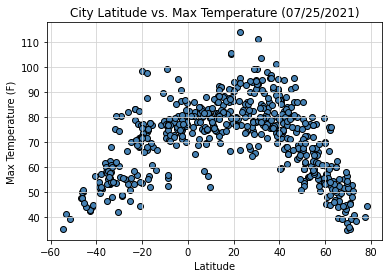

The plot is analyzing the relationship between latitue and temperature.


In [154]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Max Temperature (07/25/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig1.png")
plt.show()
print("The plot is analyzing the relationship between latitue and temperature.")

## Latitude vs. Humidity Plot

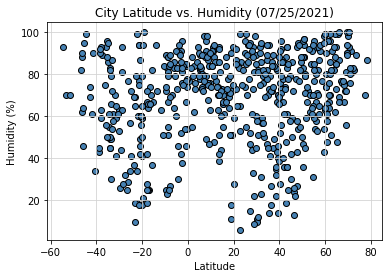

The plot is analyzing the relationship between latitue and humidity.


In [155]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Humidity (07/25/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig2.png")
plt.show()
print("The plot is analyzing the relationship between latitue and humidity.")

## Latitude vs. Cloudiness Plot

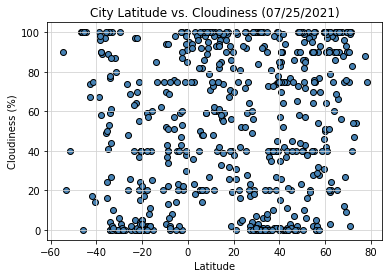

The plot is analyzing the relationship between latitue and cloudiness.


In [156]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Cloudiness (07/25/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig3.png")
plt.show()
print("The plot is analyzing the relationship between latitue and cloudiness.")

## Latitude vs. Wind Speed Plot

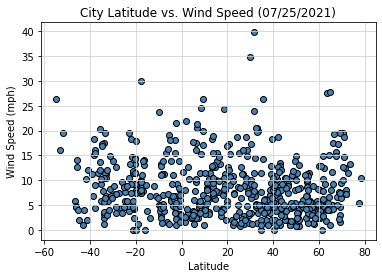

The plot is analyzing the relationship between latitue and wind speed.


In [157]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Wind Speed (07/25/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig4.png")
plt.show()
print("The plot is analyzing the relationship between latitue and wind speed.")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [144]:
Northern_data = clean_city_data[clean_city_data["Lat"]>=0]

The r-value is: -0.6635938886951419


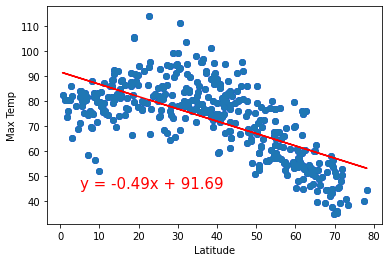

In [145]:
plt.scatter(Northern_data["Lat"],Northern_data["Max Temp"],color='blue')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
x_values = Northern_data["Lat"]
y_values = Northern_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [146]:
Southern_data = clean_city_data[clean_city_data["Lat"]<0]

The r-value is: 0.7494292866485077


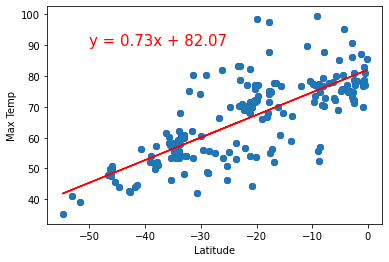

In [147]:
plt.scatter(Southern_data["Lat"],Southern_data["Max Temp"],color='blue')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
x_values = Southern_data["Lat"]
y_values = Southern_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04262957908663914


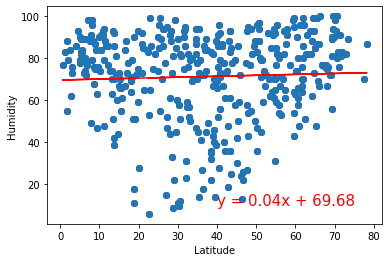

In [148]:
plt.scatter(Northern_data["Lat"],Northern_data["Humidity"],color='blue')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
x_values = Northern_data["Lat"]
y_values = Northern_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01891167927310038


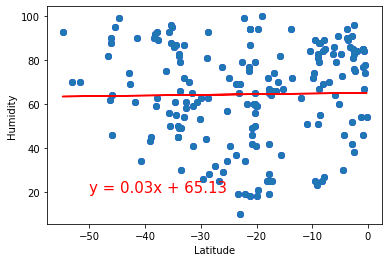

In [149]:
plt.scatter(Southern_data["Lat"],Southern_data["Humidity"],color='blue')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
x_values = Southern_data["Lat"]
y_values = Southern_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.0007888804606897178


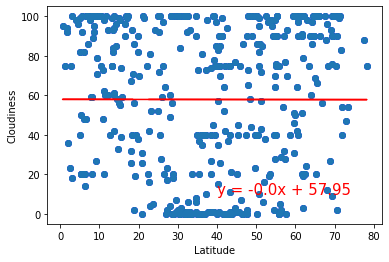

In [150]:
plt.scatter(Northern_data["Lat"],Northern_data["Cloudiness"],color='blue')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
x_values = Northern_data["Lat"]
y_values = Northern_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.11518508752111974


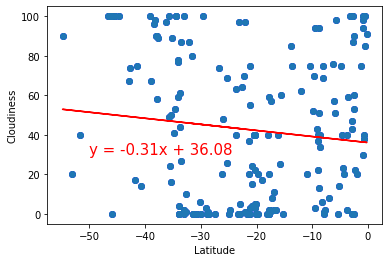

In [151]:
plt.scatter(Southern_data["Lat"],Southern_data["Cloudiness"],color='blue')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
x_values = Southern_data["Lat"]
y_values = Southern_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.08340337954915995


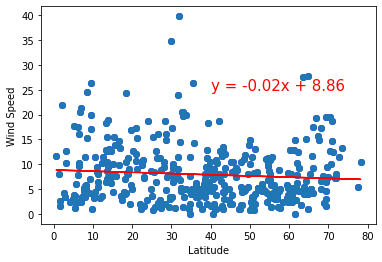

In [152]:
plt.scatter(Northern_data["Lat"],Northern_data["Wind Speed"],color='blue')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
x_values = Northern_data["Lat"]
y_values = Northern_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14147912641606286


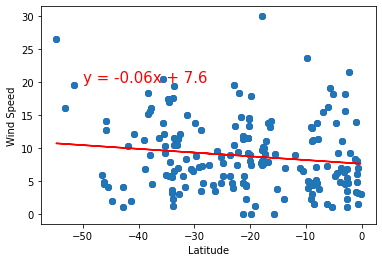

In [153]:
plt.scatter(Southern_data["Lat"],Southern_data["Wind Speed"],color='blue')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
x_values = Southern_data["Lat"]
y_values = Southern_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")
plt.show()